<a href="https://colab.research.google.com/github/sweetmjkim/study_data_analytics/blob/main/docs/pandas/Q_EDA_LetalCarOfContractType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제안 7: 지불 방식에 따른 고객 행동 분석
  - 문제 정의: 다양한 지불 방식(예: CMS, 카드 이체 등)을 사용하는 고객들의 행동 패턴을 분석합니다.
  - 배경: 지불 방식에 따른 고객 행동을 이해함으로써, 효율적인 결제 시스템을 설계하고 고객 서비스를 개선할 수 있습니다.


In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns
df_LCOCT = pd.read_csv('/content/LetalCarOfContractType.csv')
df_LCOCT.dropna(inplace=True)
df_LCOCT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40480 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40480 non-null  int64  
 1   type_of_contract   40480 non-null  object 
 2   type_of_contract2  40480 non-null  object 
 3   channel            40480 non-null  object 
 4   datetime           40480 non-null  object 
 5   Term               40480 non-null  int64  
 6   payment_type       40480 non-null  object 
 7   product            40480 non-null  object 
 8   amount             40480 non-null  int64  
 9   state              40480 non-null  object 
 10  overdue_count      40480 non-null  int64  
 11  overdue            40480 non-null  object 
 12  credit rating      40480 non-null  float64
 13  bank               40480 non-null  object 
 14  cancellation       40480 non-null  object 
 15  age                40480 non-null  float64
 16  Mileage            404

In [4]:
df_LCOCT

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51295,66799197,렌탈,Promotion,영업방판,2020-02-03,39,카드이체,K5,120900,해약확정,0,없음,1.0,롯데카드,해약,48.0,1869.0
51296,66792778,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,2.0,롯데카드,정상,44.0,1947.0
51297,66799607,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,8.0,신한은행,해약,70.0,2623.0
51300,66799558,렌탈,Normal,영업방판,2020-02-03,60,카드이체,K1,96900,해약확정,0,없음,8.0,롯데카드,해약,39.0,1753.0


## 기술 데이터 분석(DDA)

In [5]:
df_LCOCT['payment_type'].unique()

array(['CMS', '카드이체'], dtype=object)

In [6]:
# 지불 방식에 따른 고객들의 행동 패턴 확인
df_LCOCT['payment_type'].value_counts()
# 대부분 고객들은 결제시 CMS 결제수단을 더 이용함.
# 인사이트 : 지불 방싱에서 CMS 결제수단을 고객들이 더 선호하는거로 보여짐. CMS 결제 시스템에 대한 마케팅 계획 수립을 세워봐야 할듯.

CMS     26274
카드이체    14206
Name: payment_type, dtype: int64

In [7]:
# 지불 방식에 따른 CMS & 카드이체의 비중
CMS_count = df_LCOCT[df_LCOCT['payment_type'] == 'CMS'].shape[0]
Card_count = df_LCOCT[df_LCOCT['payment_type'] == '카드이체'].shape[0]
payment_type_rate = CMS_count / Card_count
payment_type_rate
# 렌트카 결제시 카드이체보다 약 1.8배 많은 CMS 결제수단을 더 이용하는거로 보여짐.
# 인사이트 : 회사 입장에서는 카드 수수료를 발생에 대한 부담감으로 CMS 비중을 높이는 방향을 생각할 필요 있음.

1.8495002111783754

In [10]:
# 지불시 결제은행 분포 확인
df_LCOCT['bank'].value_counts()[:5]
# 롯데카드사와 국민은행이 상위 1,2위를 나온다.
# 인사이트 : 롯데카드사와 국민은행을 주거래은행으로 등록하고 업무협약을 맺어보는 뱡향을 제시해보자

롯데카드    8755
국민은행    8032
농협은행    5280
신한은행    2767
우리은행    2671
Name: bank, dtype: int64

# EDA

<Axes: xlabel='payment_type', ylabel='amount'>

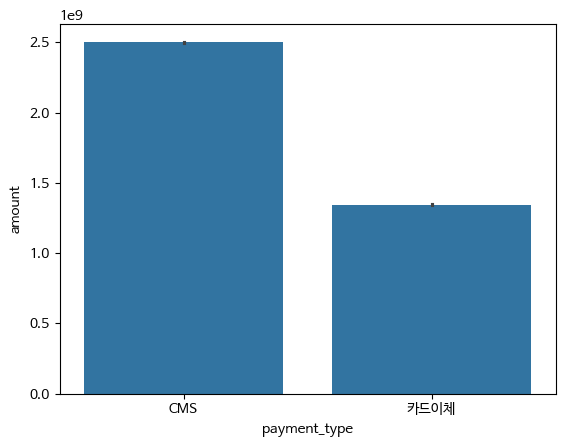

In [9]:
# CMS 결제건의 amount 총합
sns.barplot(data=df_LCOCT, x='payment_type', y='amount', estimator=sum)
# 배경: 지불 방식에 따른 고객 행동을 이해함으로써, 효율적인 결제 시스템을 설계하고 고객 서비스를 개선할 수 있습니다.